# Gravity Spy (Gravitational Waves) - A Deep Learning Model  
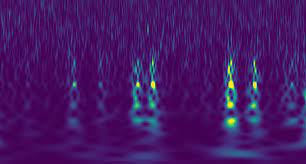

Image Source: https://arxiv.org/pdf/2205.13672.pdf


Gravity Spy is an innovative citizen-science meets Machine Learning meets gravitational waves physics project. LIGO, is the most sensitive and most complicated gravitational experiment ever created, is vulnerable to a great deal of instrumental and environmental sources of noise called glitches. These glitches, are difficult to model using computers, can mimic true astrophysical signals, and generally make LIGO less sensitive to gravitational waves. By selecting the right classification for a given glitch, one can help computers learn to do this classification themselves on much larger datasets, which helps scientists determine and eliminate the sources of noise. For more details visit: https://gravity-spy.github.io/ & https://www.zooniverse.org/projects/zooniverse/gravity-spy

# Objective: 
Our objective is to train the various Deep Learning Model which can classify the glitches present in the Gravity Spy dataset.

## The following steps are taken in this work:

1. Downloaded the dataset from https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves.
2. Understanding the dataset and formulating the problem.
3. Preparing the data for modeling. Training & evaluating the different Deep Machine Learning models and tuning hyperparameters to improve models.
4. Report of final performance of best model and showing sample predictions.
5. At last, summary of the work and links to references.

# Installing Required Libraries

In [ ]:
!pip install opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import pandas as pd
import opendatasets as od
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
project_name='gravity-spy'

# Downloading the Dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves?select=trainingset_v1d1_metadata.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitinjoshi07
Your Kaggle Key: ··········


100%|██████████| 3.89G/3.89G [00:58<00:00, 71.7MB/s]


In [ ]:
os.listdir('./gravity-spy-gravitational-waves')

['validation', 'test', 'train', 'trainingset_v1d1_metadata.csv']

In [ ]:
metadata_df = pd.read_csv('./gravity-spy-gravitational-waves/trainingset_v1d1_metadata.csv') 
metadata_df.label.value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
1400Ripples              81
None_of_the_Above        81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

In [ ]:
train_classes = os.listdir('./gravity-spy-gravitational-waves' + "/train"+'/train')
print(train_classes)

['No_Glitch', 'Violin_Mode', 'Repeating_Blips', 'Paired_Doves', 'Whistle', 'Chirp', 'Wandering_Line', 'Low_Frequency_Lines', 'Blip', '1080Lines', 'Tomte', 'Low_Frequency_Burst', 'Air_Compressor', 'Power_Line', 'None_of_the_Above', 'Scratchy', 'Light_Modulation', 'Scattered_Light', 'Extremely_Loud', 'Helix', 'Koi_Fish', '1400Ripples']


In [ ]:
test_classes = os.listdir('./gravity-spy-gravitational-waves' + "/test"+'/test')
print(test_classes)

['No_Glitch', 'Violin_Mode', 'Repeating_Blips', 'Paired_Doves', 'Whistle', 'Chirp', 'Wandering_Line', 'Low_Frequency_Lines', 'Blip', '1080Lines', 'Tomte', 'Low_Frequency_Burst', 'Air_Compressor', 'Power_Line', 'None_of_the_Above', 'Scratchy', 'Light_Modulation', 'Scattered_Light', 'Extremely_Loud', 'Helix', 'Koi_Fish', '1400Ripples']


In [ ]:
validation_classes = os.listdir('./gravity-spy-gravitational-waves' + "/validation"+'/validation')
print(validation_classes)

['No_Glitch', 'Violin_Mode', 'Repeating_Blips', 'Paired_Doves', 'Whistle', 'Chirp', 'Wandering_Line', 'Low_Frequency_Lines', 'Blip', '1080Lines', 'Tomte', 'Low_Frequency_Burst', 'Air_Compressor', 'Power_Line', 'None_of_the_Above', 'Scratchy', 'Light_Modulation', 'Scattered_Light', 'Extremely_Loud', 'Helix', 'Koi_Fish', '1400Ripples']


Let's look inside a couple of folders, one from the training set and another from the test set.

In [ ]:
Wandering_Line =  os.listdir('./gravity-spy-gravitational-waves/train/train/Wandering_Line')
print('No. of training examples for Wandering_Line:', len(Wandering_Line))
print(Wandering_Line[:5])

No. of training examples for Wandering_Line: 116
['H1_PAm6vhdDX5_spectrogram_0.5.png', 'H1_Zb8HNODd8E_spectrogram_1.0.png', 'H1_Zb8HNODd8E_spectrogram_2.0.png', 'H1_1eOIJvG4v1_spectrogram_2.0.png', 'H1_PAm6vhdDX5_spectrogram_4.0.png']


In [ ]:
Wandering_Line =  os.listdir('./gravity-spy-gravitational-waves/test/test/Wandering_Line')
print('No. of training examples for Wandering_Line:', len(Wandering_Line))
print(Wandering_Line[:5])

No. of training examples for Wandering_Line: 28
['H1_Iv7TfUinPg_spectrogram_2.0.png', 'H1_Iv7TfUinPg_spectrogram_4.0.png', 'H1_TkE6xwC6Bh_spectrogram_4.0.png', 'H1_4zIaC8wg43_spectrogram_4.0.png', 'H1_kLnGpUCre3_spectrogram_4.0.png']


We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.

In [ ]:
train_data= ImageFolder('./gravity-spy-gravitational-waves/train/train', transform=ToTensor())
validation_data= ImageFolder('./gravity-spy-gravitational-waves/validation/validation', transform=ToTensor())
test_data= ImageFolder('./gravity-spy-gravitational-waves/test/test', transform=ToTensor())

In [ ]:
len(train_data),  len(validation_data), len(test_data)

(22348, 4800, 4720)

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 479x569 px color images with 3 channels (RGB), each image tensor has the shape (3, 479, 569).

In [ ]:
image, label = train_data[120]
print(image.shape, label)
image

torch.Size([3, 479, 569]) 0


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2431, 0.2588,  ..., 0.2627, 0.2510, 0.2510],
         [0.0000, 0.2588, 0.2745,  ..., 0.2784, 0.2667, 0.2667],
         ...,
         [0.0000, 0.2627, 0.2784,  ..., 0.2667, 0.2667, 0.2667],
         [0.0000, 0.2627, 0.2784,  ..., 0.2667, 0.2667, 0.2667],
         [0.0000, 0.2627, 0.2784,  ..., 0.2667, 0.2667, 0.2667]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0196, 0.0392,  ..., 0.0588, 0.0039, 0.0039],
         [0.0000, 0.0235, 0.0431,  ..., 0.0627, 0.0078, 0.0078],
         ...,
         [0.0000, 0.0667, 0.0745,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0667, 0.0745,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0667, 0.0745,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.3137, 0.3451,  ..., 0.3647, 0.3176, 0.3176],
         [0.0000, 0.3333, 0.3686,  ..., 0.3882, 0.3373, 0.

We can view the images using matplotlib, but we need to change the tensor dimensions to (479,569,3). Let's create a helper function to display an image and its label.

In [ ]:
def show_example(image, label):
    print('Label: ', train_data.classes[label], "("+str(label)+")")
    plt.imshow(image.permute(1, 2, 0))

Label:  1080Lines (0)


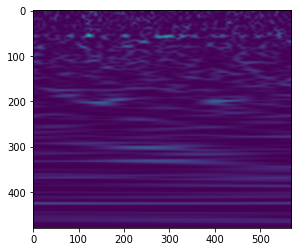

In [ ]:
show_example(*train_data[0])

Label:  Blip (3)


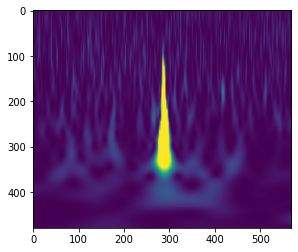

In [ ]:
show_example(*train_data[1500])

We can now create data loaders for training and validation, to load the data in batches

In [ ]:
batch=128

In [ ]:
train_dataloader = DataLoader(train_data, batch, shuffle=True, num_workers=4, pin_memory=True)
val_dataloader = DataLoader(validation_data, batch*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(25, 25))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

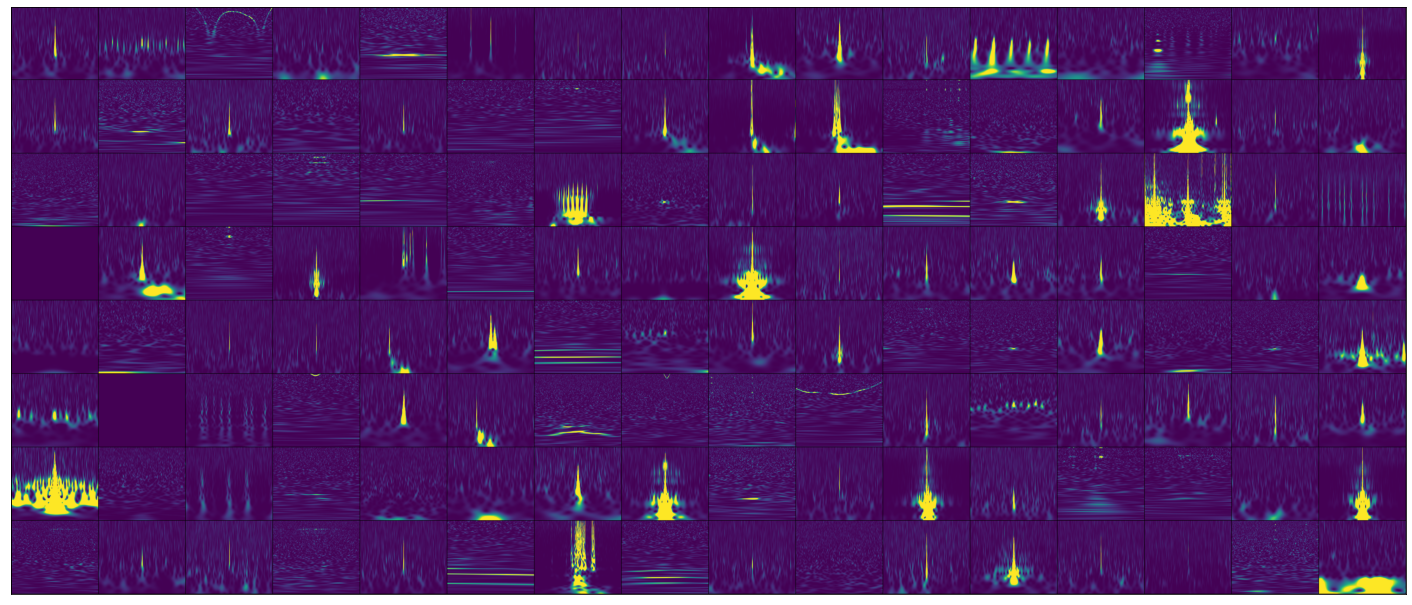

In [ ]:
show_batch(train_dataloader)

To display batches of data in a grid, we need to normalize the dimensions of the images. Here we are using 256 x 256px images with normalization to yield `3 * 256 * 256`

In [ ]:
train_tfms = tt.Compose([tt.Resize((256, 256)),
                         tt.RandomRotation(0),
                         tt.ToTensor(),
                         tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
validation_tfms = tt.Compose([tt.Resize((256, 256)),
                         tt.RandomRotation(0),
                         tt.ToTensor(),
                         tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = tt.Compose([tt.Resize((256, 256)),
                        tt.ToTensor(),
                        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
train_data= ImageFolder('./gravity-spy-gravitational-waves/train/train', train_tfms)
validation_data= ImageFolder('./gravity-spy-gravitational-waves/validation/validation', validation_tfms)
test_data= ImageFolder('./gravity-spy-gravitational-waves/test/test', test_tfms)

In [ ]:
image, label = train_data[0]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 256, 256]) Label: 0


In [ ]:
image, label = validation_data[120]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 256, 256]) Label: 0


In [ ]:
image, label = test_data[120]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 256, 256]) Label: 0


Label:  1080Lines (0)


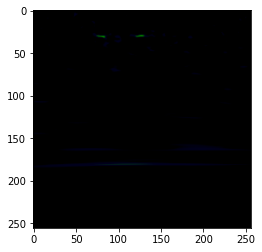

In [ ]:
show_example(*train_data[200])

You can see the difference between the standardized and non-standardized images earlier due to normalization

We can now create data loaders for training and validation, to load the data in batches

In [ ]:
batch_size=32

In [ ]:
train_dl = DataLoader(train_data, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(validation_data, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(25, 25))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

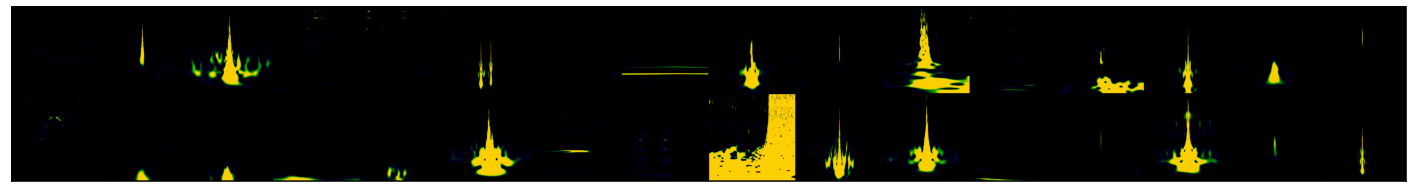

In [ ]:
show_batch(train_dl)

## Convolutional Neural Networks

We will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch

The `Conv2d` layer transforms a 3-channel image to a 16-channel *feature map*, and the `MaxPool2d` layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.

<img src="https://i.imgur.com/KKtPOKE.png" style="max-width:540px">

Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class GravitySpyModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 16 x 128 x 128

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 64 x 64

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 32 x 32

            nn.Flatten(), 
            nn.Linear(64*32*32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 196))
        
    def forward(self, xb):
        return self.network(xb)


We'll use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

In [ ]:
model = GravitySpyModel()
model

GravitySpyModel(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=65536, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU.

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(GravitySpyModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 5.272945880889893, 'val_acc': 0.0}

The initial accuracy is 0.0%, which is what one might expect from a randomly intialized model (since it has a 1 in 196 chance of getting a label right by guessing randomly).

We'll use the following *hyperparmeters* (learning rate, no. of epochs, batch_size etc.) to train our model.

In [ ]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.2050, val_loss: 0.3443, val_acc: 0.9035
Epoch [1], train_loss: 0.2746, val_loss: 0.2446, val_acc: 0.9250
Epoch [2], train_loss: 0.1780, val_loss: 0.2173, val_acc: 0.9371
Epoch [3], train_loss: 0.1186, val_loss: 0.2456, val_acc: 0.9317
Epoch [4], train_loss: 0.0910, val_loss: 0.2286, val_acc: 0.9394
Epoch [5], train_loss: 0.0730, val_loss: 0.2631, val_acc: 0.9388
Epoch [6], train_loss: 0.0599, val_loss: 0.2654, val_acc: 0.9310
Epoch [7], train_loss: 0.0475, val_loss: 0.3030, val_acc: 0.9381


We can also plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

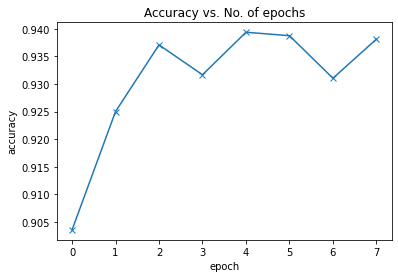

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 93.6%, and by looking at the graph, it seems model will fluctuate around this accuracy even after training for a long time. We can also plot the training and validation losses to study the trend.

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

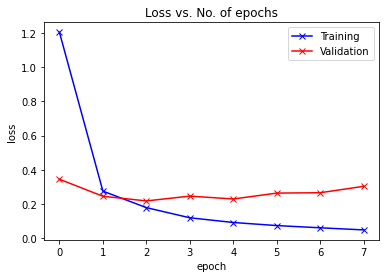

In [ ]:
plot_losses(history)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset. We begin by creating a test dataset using the `ImageFolder` class.

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_data.classes[preds[0].item()]

Label: Blip , Predicted: Blip


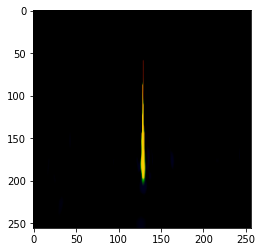

In [ ]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Label: Chirp , Predicted: Chirp


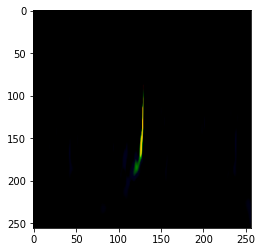

In [ ]:
img, label = test_data[1390]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

It seems, our model is performing very well.

As a final step, let's also look at the overall loss and accuracy of the model on the test set. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_data, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.34111344814300537, 'val_acc': 0.9481982588768005}

## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), 'Gravityspy.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [ ]:
model2 = to_device(GravitySpyModel(), device)

In [ ]:
model2.load_state_dict(torch.load('Gravityspy.pth'))

<All keys matched successfully>

# Data Augmentation, Regularization and ResNets

 Data transforms (normalization & data augmentation)

In [ ]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.Resize((256, 256)),
                         tt.RandomRotation(0),
                         tt.ToTensor(),
                         tt.Normalize(*stats, inplace = True)])
valid_tfms = tt.Compose([tt.Resize((256, 256)),
                        tt.ToTensor(),
                        tt.Normalize(*stats)])
test_tfms = tt.Compose([tt.Resize((256, 256)),
                        tt.ToTensor(),
                        tt.Normalize(*stats)])

In [ ]:
train_data1= ImageFolder('./gravity-spy-gravitational-waves/train/train', train_tfms)
validation_data1= ImageFolder('./gravity-spy-gravitational-waves/validation/validation', valid_tfms)
test_data1= ImageFolder('./gravity-spy-gravitational-waves/validation/validation', test_tfms)

Next, we can create data loaders for retrieving images in batches. We'll use a relatively small batch size of 15 so that we dont run into GPU RAM out of memory error.

In [ ]:
batch_size = 15

Using PyTorch data loaders

In [ ]:
train_dl1 = DataLoader(train_data1, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl1 = DataLoader(validation_data1, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


To seamlessly use a GPU, as earlier, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU.

In [ ]:
train_dl1 = DeviceDataLoader(train_dl1, device)
valid_dl1 = DeviceDataLoader(valid_dl1, device)

## Model with Residual Blocks and Batch Normalization

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

Here is a very simple Residual block:

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl1:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([15, 3, 256, 256])


In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in valid_dl1:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([30, 3, 256, 256])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(32768, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 196), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Training the model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl1)]
history

[{'val_loss': 5.277474403381348, 'val_acc': 0.0}]

The initial accuracy is 0.0%, which is what one might expect from a randomly intialized model (since it has a 1 in 196 chance of getting a label right by guessing randomly).

We'll use the following *hyperparmeters* (learning rate, no. of epochs, grad_clip etc.) to train our model.

In [ ]:
epochs = 5
max_lr = 0.0001
grad_clip = 0.1
weight_decay = 1e-4

opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl1, valid_dl1,
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)

Epoch [0], last_lr: 0.00008, train_loss: 0.9115, val_loss: 0.5239, val_acc: 0.8685
Epoch [1], last_lr: 0.00010, train_loss: 0.5254, val_loss: 0.6845, val_acc: 0.8042
Epoch [2], last_lr: 0.00006, train_loss: 0.3626, val_loss: 0.2789, val_acc: 0.9335
Epoch [3], last_lr: 0.00002, train_loss: 0.2108, val_loss: 0.2109, val_acc: 0.9452
Epoch [4], last_lr: 0.00000, train_loss: 0.1133, val_loss: 0.1713, val_acc: 0.9544
CPU times: user 23min 10s, sys: 22min 59s, total: 46min 9s
Wall time: 55min 6s


Let's plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

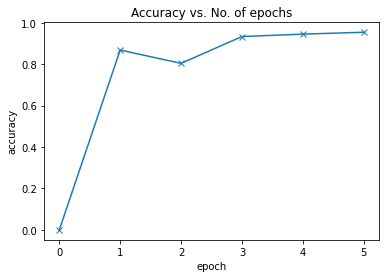

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

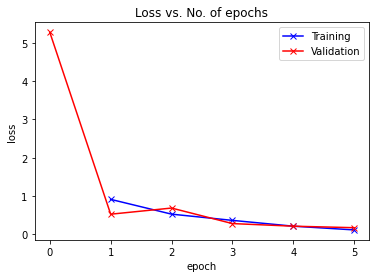

In [ ]:
plot_losses(history)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset.


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_data1.classes[preds[0].item()]

Label: 1080Lines , Predicted: 1080Lines


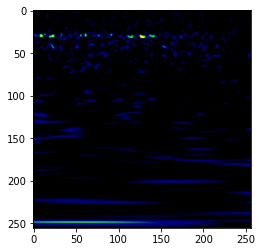

In [ ]:
img, label = test_data1[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data1.classes[label], ', Predicted:', predict_image(img, model))

Label: Light_Modulation , Predicted: Light_Modulation


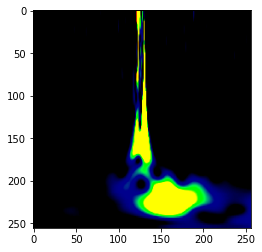

In [ ]:
img, label = test_data1[2500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data1.classes[label], ', Predicted:', predict_image(img, model))

Label: Blip , Predicted: Blip


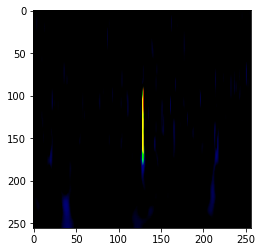

In [ ]:
img, label = test_data1[350]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data1.classes[label], ', Predicted:', predict_image(img, model))

# Conclusion

In this notebook, we built Convolutional Neural Networks and used various advanced techniques like Normalization, Data Augmentation, Regularization, Residual connections, etc wih our batches of data, to perform Image Classification for the `Gravity Spy Dataset`. We built some models from scratch, trained and tuned them. Following are our observations:

1. With Convolutional Neural Networks, we have achived 94.8% accuracy. Model predicted all the images correctly.

2. With the ResNet34 model for our Gravity Spy model, we got a fairly good accuracy of over 95.4%.

Due to the huge data size and harware limitation we could not exiperment more to tune our model further. For example increasing the batch size leads to RAM error and sometimes GPU memory error. Also, it is taking more than hour to train the model on very samll batch_size. The accuracy of this model can be further increased, if we dont have hardware limitation. One can easily increase the accuracy upto 97% or more. 
